# **Book Summary vs. Book Cover:** Is it easier to predict a book genre based on the book summary or the book cover?

Author: Alyssa Hayo

Semester: Spring 2021

School: UMBC

Class: DATA606 - Capstone

In [ ]:
# import statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import json
import math

import os
import codecs
from argparse import ArgumentParser
from urllib import request
from tqdm import trange
from joblib import Parallel, delayed

import requests, zipfile, io
import tarfile
import csv
from tqdm import tqdm

## 1. Book Summary Data

### 1.1 Download the Data

In [ ]:
download_url = "http://www.cs.cmu.edu/~dbamman/data/booksummaries.tar.gz"
r = requests.get(download_url)

tar_bytes = io.BytesIO(r.content)
tf = tarfile.open(mode = 'r', fileobj=tar_bytes)
tf.extractall()

In [ ]:
#code adapted from: https://www.kaggle.com/iamhungundji/book-summary-genre-prediction/notebook

data = []

with open("booksummaries/booksummaries.txt", 'r') as f:
    reader = csv.reader(f, dialect='excel-tab')
    for row in tqdm(reader):
        data.append(row)

16559it [00:00, 22410.24it/s]


In [ ]:
#code adapted from: https://www.kaggle.com/iamhungundji/book-summary-genre-prediction/notebook
wiki_id = []
freebase_id = []
book_title = []
book_author = []
publication_date = []
genre = []
summary = []

for i in tqdm(data):
    wiki_id.append(i[0])
    freebase_id.append(i[1])
    book_title.append(i[2])
    book_author.append(i[3])
    publication_date.append(i[4])
    genre.append(i[5])
    summary.append(i[6])

books_summary = pd.DataFrame(data, columns = {'wiki_id': wiki_id, 'freebase_id': freebase_id, 
                      'book_title': book_title, 'book_author': book_author,
                      'publication_date': publication_date, 'genre': genre, 
                      'summary': summary})
books_summary.head()

100%|██████████| 16559/16559 [00:00<00:00, 405409.15it/s]


,wiki_id,freebase_id,book_title,book_author,publication_date,genre,summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,,,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...


In [ ]:
books_summary.describe()

,wiki_id,freebase_id,book_title,book_author,publication_date,genre,summary
count,16559,16559,16559,16559,16559,16559,16559
unique,16559,16559,16277,4715,2640,2155,16532
top,944932,/m/0dlb7g,Nemesis,,,,~Plot outline description~ --> <!--
freq,1,1,6,2382,5610,3718,13


In [ ]:
books_summary.shape

(16559, 7)

Data is downloaded! We have 7 columns and 16559 rows.

### 1.2 Clean the Data

#### 1.2.1 What do our genres look like?

In [ ]:
print(books_summary['genre'].describe())
print()
print(books_summary['genre'].value_counts())

count     16559
unique     2155
top            
freq       3718
Name: genre, dtype: object

                                                                                                                                                                                                                           3718
{"/m/05hgj": "Novel"}                                                                                                                                                                                                       839
{"/m/06n90": "Science Fiction", "/m/014dfn": "Speculative fiction"}                                                                                                                                                         567
{"/m/06n90": "Science Fiction"}                                                                                                                                                                                             526
{"/m/02xlf":

Need to break the genres out into a readable list.

In [ ]:
#next 3 blocks of code taken from https://www.kaggle.com/iamhungundji/book-summary-genre-prediction/notebook
books_summary.drop(books_summary[books_summary['genre']==''].index, inplace=True)
books_summary[books_summary['genre']=='']

,wiki_id,freebase_id,book_title,book_author,publication_date,genre,summary


In [ ]:
genres = []
for i in books_summary['genre']:
    genres.append(list(json.loads(i).values()))
books_summary['genre_new'] = genres

In [ ]:
# How many genres are there?
all_genres = sum(genres,[])
len(set(all_genres))

227

In [ ]:
books_summary.sample(5)

,wiki_id,freebase_id,book_title,book_author,publication_date,genre,summary,genre_new
9434,10192978,/m/02q4rms,Jeffrey and Sloth,Kari-Lynn Winters,2007,"{""/m/0dwly"": ""Children's literature""}",Jeffrey can't think of how to start his writi...,[Children's literature]
11221,14504853,/m/03d5pdk,Antony and Cleopatra,Colleen McCullough,2007-12-04,"{""/m/02xlf"": ""Fiction"", ""/m/01qxvh"": ""Romance ...",McCullough continues her Masters of Rome seri...,"[Fiction, Romance novel, Historical novel]"
10228,12089444,/m/02vpg_y,Irish Love,Andrew Greeley,2001-01,"{""/m/02n4kr"": ""Mystery"", ""/m/014dfn"": ""Specula...",~Plot outline description~ --> <!--,"[Mystery, Speculative fiction]"
7525,6812955,/m/0gq6hh,Dead Boys,Richard Calder,1994,"{""/m/06n90"": ""Science Fiction""}",1 - STRANGE BOYS Doll-junky Ignatz Zwakh live...,[Science Fiction]
4471,3280309,/m/0930ms,Signal to Noise,Eric S. Nylund,1998,"{""/m/01qpc"": ""Cyberpunk"", ""/m/06n90"": ""Science...","The novel follows Jack Potter, a computer cry...","[Cyberpunk, Science Fiction, Speculative fiction]"


#### 1.2.2 Get the count of each genre

In [ ]:
# Create a list of all of the genres
genre_list = []

for i, row in books_summary.iterrows():
  genres = row['genre_new']
  for item in range(len(genres)):
    genre_list.append(genres[item])

In [ ]:
# Grabbed code from: https://www.geeksforgeeks.org/counting-the-frequencies-in-a-list-using-dictionary-in-python/

def CountFrequency(my_list):
  # Create an empty dictionary
  freq = {}
  for item in my_list:
    if (item in freq):
      freq[item] += 1
    else:
      freq[item] = 1

  return freq

In [ ]:
genre_count = CountFrequency(genre_list)

In [ ]:
# View the genre and their count
for key,value in genre_count.items():
    print(key,value)

Roman à clef 29
Satire 123
Children's literature 2122
Speculative fiction 4314
Fiction 4747
Science Fiction 2870
Novella 87
Utopian and dystopian fiction 67
Existentialism 8
Absurdist fiction 29
Novel 2463
Hard science fiction 25
Fantasy 2413
War novel 87
Bildungsroman 42
Religious text 4
Picaresque novel 18
Gothic fiction 112
Horror 511
Invasion literature 4
Mystery 1396
Epistolary novel 30
Parody 15
Psychological novel 26
Farce 4
Philosophy 47
Science 22
Dystopia 127
Detective fiction 341
Suspense 765
Historical fiction 388
Adventure novel 330
Humour 62
Historical novel 654
Sea story 4
Cyberpunk 16
Business 16
Non-fiction 230
Economics 13
Anthropology 4
Sociology 31
Romance novel 435
Poetry 28
Chivalric romance 15
High fantasy 66
Time travel 20
Scientific romance 14
Crime Fiction 753
Juvenile fantasy 2
Religion 16
Inspirational 10
Short story 78
Techno-thriller 59
Thriller 568
Young adult literature 825
Drama 29
Play 9
Albino bias 2
Computer Science 1
Reference 38
Supernatural 4
Come

In [ ]:
# How many genres are there? - Confirm it is still the same as earlier, it should be 227.
print(len(genre_count))

227


For each genre for the book, creat a new row with only one genre.

In [ ]:
# Create a blank dataframe to append the new rows to
blank_df = pd.DataFrame(columns=['wiki_id','freebase_id','book_title','book_author','publication_date','genre_new','summary'])

# If there are multiple genres, make a new row for each genre
for i, row in books_summary.iterrows():
  genres = row['genre_new']
  for x in range(len(genres)):
    genre_name = genres[x]
    new_row = [row['wiki_id'],row['freebase_id'],row['book_title'],row['book_author'],row['publication_date'],genre_name, row['summary']]
    new_df = pd.DataFrame([new_row], columns=['wiki_id','freebase_id','book_title','book_author','publication_date','genre_new','summary'])
    blank_df = blank_df.append(new_df)

In [ ]:
books_summary.sample(5)

,wiki_id,freebase_id,book_title,book_author,publication_date,genre,summary,genre_new
7099,6051490,/m/0fmm9s,The Silver Wolf,Alice Borchardt,1993,"{""/m/014dfn"": ""Speculative fiction"", ""/m/01hmn...","""I was born of darkness. My father's eyes clo...","[Speculative fiction, Fantasy]"
5498,4392699,/m/0b_vn4,The Pilot: A Tale of the Sea,James Fenimore Cooper,,"{""/m/0hwxm"": ""Historical novel""}","The hero of the book is John Paul Jones, who ...",[Historical novel]
10897,13736656,/m/03cgny2,Rasputin,Kathryn H. Kidd,,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",This book has not yet been released.,"[Science Fiction, Speculative fiction]"
4213,3005777,/m/08k2gv,The History of Henry Esmond,William Makepeace Thackeray,1852,"{""/m/02p0szs"": ""Historical fiction"", ""/m/02xlf...",Using sporadically the first and third person...,"[Historical fiction, Fiction]"
14224,23507384,/m/06wbd62,The Accounting,Bruce Marshall,1958,"{""/m/05hgj"": ""Novel""}","The scene of this novel is Paris, where the b...",[Novel]


#### 1.2.3 Genre mapping file

I'm going to export the dataframe as a csv, do the mappings in excel, and the bring the new csv file back in, which I'll use as the final dataframe.

In [ ]:
# export file to csv
books_summary.to_csv('book_summary.csv')

Bring in Genre Mapping File

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = "https://drive.google.com/file/d/1xVa92aQnbxwEO09RyAJzFJG7Wb2jC5JM/view?usp=sharing"

id = '1xVa92aQnbxwEO09RyAJzFJG7Wb2jC5JM'

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('book_summary_genres.csv', mimetype='application/vnd.openxmlformats-officedocument.spreadsheetml.sheet')

In [ ]:
books_summary_new = pd.read_csv('book_summary_genres.csv', encoding="ISO-8859-1")
books_summary_new = books_summary_new[['wiki_id','book_title','book_author','publication_date','genre','summary']]
books_summary_new.sample(5)

,wiki_id,book_title,book_author,publication_date,genre,summary
24869,4773747,Clans of the Alphane Moon,Philip K. Dick,1964,Fantasy,War between Earth and insectoid-dominated Alp...
12835,31909675,The Vespertine,NaN,3/7/2011,Non-Fiction,"In the summer of 1889, Amelia van den Broek i..."
19619,4595808,The Gospel of the Flying Spaghetti Monster,Bobby Henderson,3/28/2006,Other,The Gospel presents the tenets of Pastafarian...
9229,2912627,The Code of the Woosters,P. G. Wodehouse,10/7/1938,Literary Fiction,The Code of the Woosters is the first install...
5975,5266592,Excalibur: A Novel of Arthur,Bernard Cornwell,NaN,Fantasy,The novel begins shortly after the end of Ene...


In [ ]:
# what is the new shape of our data?
books_summary_new.shape

(30004, 6)

*These are the mappings I used. I did my best to get the genre in a similar count range and this is an area that could use some improvement.*

**Children's:** Boy's school stories, Children's literature, English public-school stories

**Fantasy:** Bangsian fantasy, Cabal, Comic fantasy, Contemporary fantasy, Dark fantasy, Fable, Fairy tale, Fairytale fantasy, Fantastique, Fantasy, Fantasy of manners, Heroic fantasy, High fantasy, Historical fantasy, Juvenile fantasy, Low fantasy, Magic realism, Science fantasy, Speculative fiction, Superhero fiction, Urban fantasy, Vampire fiction, Zombie, Zombies in popular culture

**Literary Fiction:** Absurdist fiction, Adventure, Adventure novel, American Gothic Fiction, Anti-nuclear, Anti-war, Bildungsroman, Bit Lit, Campus novel, Catastrophic literature, Children's literature, Collage, Coming of age, Conspiracy, Conspiracy fiction, Cozy, Ergodic literature, Experimental literature, Fiction, Fictional crossover, First-person narrative, Gay novel, Gay Themed, Gothic fiction, Industrial novel, Inspirational, Künstlerroman, LGBT literature, Light novel, Literary fiction, Literary realism, Literary theory, Mashup, Modernism, Naval adventure, New Weird, Parallel novel, Reference, Robinsonade, Roman à clef, School story, Sea story, Social criticism, Social novel, Transgender and transsexual fiction, Urban fiction, Western fiction, Wuxia, Young adult literature, Youth

**Mystery:** Albino bias, Crime Fiction, Detective fiction, Drama, Ghost story, Hardboiled, Historical whodunnit, Horror, Locked room mystery, Mystery, Psychological novel, Serial, Social commentary, Spy fiction, Supernatural, Suspense, Techno-thriller, Thriller, Whodunit

**Non-Fiction:** Alternate history, Anthropology, Autobiographical comics, Autobiographical novel, Autobiography, Biographical novel, Biography, Biopunk, Business, Computer Science, Cookbook, Creative nonfiction, Economics, Education, Field guide, Foreign legion, Future history, Historical fiction, Historical novel, History, Literary criticism, Marketing, Mathematics, Memoir, Military history, Nature, Neuroscience, Non-fiction, Non-fiction novel, Pastiche, Philosophy, Photography, Police procedural, Political philosophy, Politics, Popular culture, Popular science, Post-holocaust, Psychology, Religion, Religious text, Science, Self-help, Social sciences, Sociology, Spirituality, Sports, Transhumanism, Travel, Travel literature, True crime, War novel, Western

**Other:** Anthology, Black comedy, Chick lit, Chivalric romance, Colonial United States romance, Comedy, Comedy of manners, Comic book, Comic novel, Comics, Edisonade, Elizabethan romance, Encyclopedia, Epistolary novel, Erotica, Essay, Farce, Gamebook, Georgian romance, Graphic novel, Historical romance, Humour, Indian chick lit, Medieval romance, Morality play, Music, New York Times Best Seller list, Novel, Novella, Paranormal romance, Parody, Personal journal, Picaresque novel, Picture book, Planetary romance, Play, Poetry, Polemic, Pornography, Prose, Prose poetry, Regency romance, Role-playing game, Romance novel, Romantic comedy, Satire, Scientific romance, Short story, Tragicomedy, Treatise

**Science Fiction:** Alien invasion, Apocalyptic and post-apocalyptic fiction, Comic science fiction, Cyberpunk, Dying Earth subgenre, Dystopia, Epic Science Fiction and Fantasy, Existentialism, Feminist science fiction, Hard science fiction, Human extinction, Invasion literature, Lost World, Metaphysics, Military science fiction, Postcyberpunk, Postmodernism, Science Fiction, Social science fiction, Soft science fiction, Space opera, Space western, Steampunk, Subterranean fiction, Sword and planet, Sword and sorcery, Time travel, Utopian and dystopian fiction, Utopian fiction


In [ ]:
# what is the count for each genre? wiki_id is a unique value, so I'll use that for counts
books_summary_new[['genre','wiki_id']].groupby(['genre']).count()

,wiki_id
genre,
Children's,2123
Fantasy,6970
Literary Fiction,6388
Mystery,4720
Non-Fiction,2419
Other,4003
Science Fiction,3381


#### 1.2.4 Rest of data cleaning

In [ ]:
# download stop words
import nltk
nltk.download('stopwords')

stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
summary_data = books_summary_new.copy()

# drop null values
summary_data = summary_data.dropna()

# convert summaries to lower case
summary_data['summary'] = summary_data['summary'].str.lower()

# remove stop words - adatped from: https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe
summary_data['summary_old'] = summary_data['summary']
summary_data['summary'] = summary_data['summary_old'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# remove punctuation - adapted from: https://stackoverflow.com/questions/39782418/remove-punctuations-in-pandas
summary_data['summary'] = summary_data['summary'].str.replace('[^\w\s]','')

summary_data.sample(3)

,wiki_id,book_title,book_author,publication_date,genre,summary,summary_old
9057,2519281,The Ticket That Exploded,William S. Burroughs,1962,Literary Fiction,ticket exploded continues adventures agent lee...,the ticket that exploded continues the advent...
14732,2516929,The Club Dumas,Arturo Pérez-Reverte,1993,Mystery,lucas corso mercenary bookdealer specializes a...,"lucas corso, a mercenary book-dealer, special..."
4849,23855758,The Forest of Hands and Teeth,Carrie Ryan,3/10/2009,Science Fiction,mary lives town ruled sisterhood guardians vil...,mary lives in a town ruled by the sisterhood ...


### 1.3 Exploratory Data Analysis

Lets create word clouds for each genre.

In [ ]:
from collections import Counter

def get_freq_dist(df):
    '''
    Processes a pandas DataFrame to concatenate every book summary into a flattened list of words.
    Once flattened we create the frequency distribution of the entirety of the DataFrame 
    '''
    full_summary = df['summary'].values
    flat_summary = " ".join([str(item) for item in full_summary])
    list_summary = flat_summary.split(" ")
    freqDist = Counter(list_summary)
    
    return freqDist

In [ ]:
freq_dist_childrens = get_freq_dist(summary_data[summary_data['genre']=="Children's"])
freq_dist_fantasy = get_freq_dist(summary_data[summary_data['genre']=="Fantasy"])
freq_dist_lit_fic = get_freq_dist(summary_data[summary_data['genre']=="Literary Fiction"])
freq_dist_mystery = get_freq_dist(summary_data[summary_data['genre']=="Mystery"])
freq_dist_non_fic = get_freq_dist(summary_data[summary_data['genre']=="Non-Fiction"])
freq_dist_other = get_freq_dist(summary_data[summary_data['genre']=="Other"])
freq_dist_sci_fi = get_freq_dist(summary_data[summary_data['genre']=="Science Fiction"])

In [ ]:
freq_list_childrens = sorted(freq_dist_childrens.items(), key=lambda item: item[1], reverse=True)
freq_list_fantasy = sorted(freq_dist_fantasy.items(), key=lambda item: item[1], reverse=True)
freq_list_lit_fic = sorted(freq_dist_lit_fic.items(), key=lambda item: item[1], reverse=True)
freq_list_mystery = sorted(freq_dist_mystery.items(), key=lambda item: item[1], reverse=True)
freq_list_non_fic = sorted(freq_dist_non_fic.items(), key=lambda item: item[1], reverse=True)
freq_list_other = sorted(freq_dist_other.items(), key=lambda item: item[1], reverse=True)
freq_list_sci_fi = sorted(freq_dist_sci_fi.items(), key=lambda item: item[1], reverse=True)

# test one
freq_list_fantasy

[('one', 7476),
 ('time', 4977),
 ('also', 4494),
 ('him', 4484),
 ('back', 4430),
 ('two', 4256),
 ('find', 4235),
 ('', 4195),
 ('new', 4061),
 ('world', 4019),
 ('however', 3754),
 ('life', 3528),
 ('first', 3379),
 ('help', 3134),
 ('finds', 3124),
 ('book', 3030),
 ('her', 2915),
 ('story', 2905),
 ('later', 2885),
 ('way', 2853),
 ('tells', 2827),
 ('man', 2801),
 ('city', 2776),
 ('king', 2753),
 ('people', 2708),
 ('takes', 2660),
 ('father', 2639),
 ('death', 2630),
 ('home', 2588),
 ('years', 2574),
 ('them', 2556),
 ('begins', 2509),
 ('take', 2482),
 ('named', 2471),
 ('go', 2459),
 ('return', 2387),
 ('house', 2357),
 ('would', 2319),
 ('eventually', 2297),
 ('it', 2266),
 ('killed', 2250),
 ('old', 2158),
 ('novel', 2139),
 ('magic', 2138),
 ('war', 2136),
 ('power', 2115),
 ('kill', 2097),
 ('becomes', 2097),
 ('become', 2077),
 ('escape', 2072),
 ('another', 2068),
 ('away', 2060),
 ('group', 2059),
 ('three', 2047),
 ('many', 2023),
 ('mother', 2023),
 ('soon', 2022),


In [ ]:
freq_list_childrens_wc = { k: v for k, v in sorted(freq_dist_childrens.items(), key=lambda item: item[1], reverse=True)}
freq_list_fantasy_wc = { k: v for k, v in sorted(freq_dist_fantasy.items(), key=lambda item: item[1], reverse=True)}
freq_list_lit_fic_wc = { k: v for k, v in sorted(freq_dist_lit_fic.items(), key=lambda item: item[1], reverse=True)}
freq_list_mystery_wc = { k: v for k, v in sorted(freq_dist_mystery.items(), key=lambda item: item[1], reverse=True)}
freq_list_non_fic_wc = { k: v for k, v in sorted(freq_dist_non_fic.items(), key=lambda item: item[1], reverse=True)}
freq_list_other_wc = { k: v for k, v in sorted(freq_dist_other.items(), key=lambda item: item[1], reverse=True)}
freq_list_sci_fi_wc = { k: v for k, v in sorted(freq_dist_sci_fi.items(), key=lambda item: item[1], reverse=True)}

In [ ]:
!pip install wordcloud

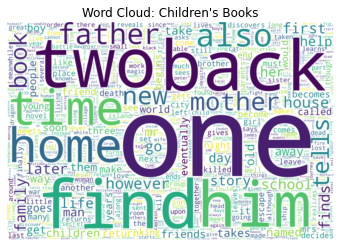

In [ ]:
from wordcloud import WordCloud

# for Children's Books
wordcloud = WordCloud(width = 3000, height=2000, max_words=1000, relative_scaling=1, background_color='white').generate_from_frequencies(freq_list_childrens_wc)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud: Children\'s Books')
plt.show()

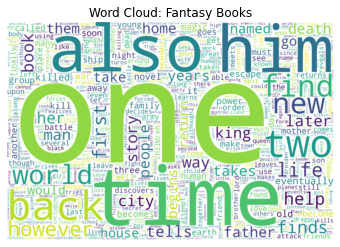

In [ ]:
# for Fantasy Books
wordcloud = WordCloud(width = 3000, height=2000, max_words=1000, relative_scaling=1, background_color='white').generate_from_frequencies(freq_list_fantasy_wc)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud: Fantasy Books')
plt.show()

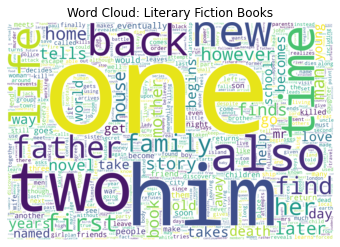

In [ ]:
# for Literary Fiction Books
wordcloud = WordCloud(width = 3000, height=2000, max_words=1000, relative_scaling=1, background_color='white').generate_from_frequencies(freq_list_lit_fic_wc)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud: Literary Fiction Books')
plt.show()

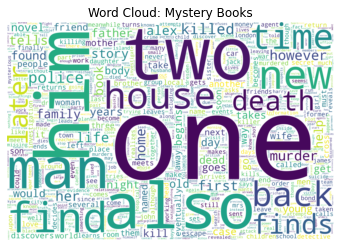

In [ ]:
# for Mystery Books
wordcloud = WordCloud(width = 3000, height=2000, max_words=1000, relative_scaling=1, background_color='white').generate_from_frequencies(freq_list_mystery_wc)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud: Mystery Books')
plt.show()

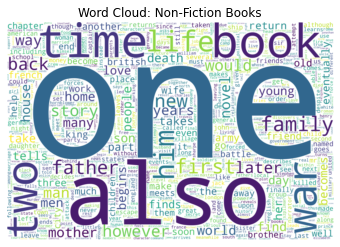

In [ ]:
# for Non-Fiction Books
wordcloud = WordCloud(width = 3000, height=2000, max_words=1000, relative_scaling=1, background_color='white').generate_from_frequencies(freq_list_non_fic_wc)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud: Non-Fiction Books')
plt.show()

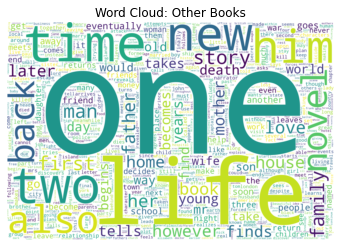

In [ ]:
# for Other Books
wordcloud = WordCloud(width = 3000, height=2000, max_words=1000, relative_scaling=1, background_color='white').generate_from_frequencies(freq_list_other_wc)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud: Other Books')
plt.show()

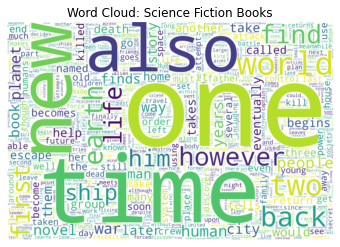

In [ ]:
# for Science Fiction Books
wordcloud = WordCloud(width = 3000, height=2000, max_words=1000, relative_scaling=1, background_color='white').generate_from_frequencies(freq_list_sci_fi_wc)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud: Science Fiction Books')
plt.show()

### 1.4 Neural Networks
- Build Dataset classes and vocabularies
- Simple RNN

#### 1.4.1 Build Dataset classes and vocabularies

In [ ]:
#import statements
import torch
import torchvision
import torch.nn as nn 
import torch.nn.functional as F
import torchvision.transforms as transforms

from torch.utils.data import Dataset, DataLoader

from tqdm.autonotebook import tqdm

import time

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [ ]:
# Using the Vocabulary Class from https://www.kdnuggets.com/2019/11/create-vocabulary-nlp-tasks-python.html

class Vocabulary:
    PAD_token = 0   # Used for padding short sentences
    SOS_token = 1   # Start-of-sentence token
    EOS_token = 2   # End-of-sentence token

    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {self.PAD_token: "PAD", self.SOS_token: "SOS", self.EOS_token: "EOS"}
        self.num_words = 3
        self.num_sentences = 0
        self.longest_sentence = 0
    
    def __len__(self):
      return self.num_words

    def add_word(self, word):
        if word not in self.word2index:
            # First entry of word into vocabulary
            self.word2index[word] = self.num_words
            self.word2count[word] = 1
            self.index2word[self.num_words] = word
            self.num_words += 1
        else:
            # Word exists; increase word count
            self.word2count[word] += 1
            
    def add_sentence(self, sentence):
        sentence_len = 0
        for word in sentence.split(' '):
            sentence_len += 1
            self.add_word(word)
        if sentence_len > self.longest_sentence:
            # This is the longest sentence
            self.longest_sentence = sentence_len
        # Count the number of sentences
        self.num_sentences += 1

    def to_word(self, index):
        return self.index2word.get(index)

    def to_index(self, word):
        return self.word2index.get(word)

In [ ]:
# Create Class - based off of Modern Practical Deep Learning (Raff's Class)
class BooksDataset(Dataset):
    
    def __init__(self, reviews_dict, alphabet):
        
        self.data = reviews_dict
        self.labels = [x for x in reviews_dict.keys()]
        self.alphabet = alphabet
        
    def __len__(self):
        return sum([len(x) for x in self.data.values()])
    
    # Return item from the dataset
    def __getitem__(self, idx):
        label = 0
        while idx >= len(self.data[self.labels[label]]):
            idx -= len(self.data[self.labels[label]])
            label += 1
        name = self.data[self.labels[label]][idx]
        
        
        
        label_vec = torch.zeros((1), dtype=torch.long)
        label_vec[0] = label
        
        return self.sentence2InputVec(name), label
    
    def sentence2InputVec(self, sentence):
      T = len(sentence.split(' '))
      sent_vec = torch.zeros((T), dtype=torch.long)
      for pos in range(T):
        if self.alphabet.to_index(sentence.split(' ')[pos]) is None:
          print(sentence.split(' '))
          print(pos)
          print(sentence.split(' ')[pos])
        sent_vec[pos] = self.alphabet.to_index(sentence.split(' ')[pos])
            
      return sent_vec


In [ ]:
# Create Vocabulary for Genres
vocab_list_g = Vocabulary("Vocab for Genres")

In [ ]:
# Add all of the words to the Vocabulary
for i, row in summary_data.iterrows():
    summary = row['summary']
    vocab_list_g.add_sentence(summary)

In [ ]:
# Test to make sure vocabulary works
sent_tkns = []
sent_idxs = []

for i, row in summary_data.iterrows():
  for word in row['summary'].split(' '):
    sent_tkns.append(word)
    sent_idxs.append(vocab_list_g.to_index(word))

print(sent_tkns[:10])
print(sent_idxs[:10])

['text', 'plague', 'divided', 'five', 'parts', 'town', 'oran', 'thousands', 'rats', 'initially']
[3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [ ]:
# Put everything in a list with the format: [[summary_1, q_group_1],[summary_2, q_group_2], ... ,[summary_n, q_group_n]]

g_label = []
for i,row in summary_data.iterrows():
  g_label.append([row['summary'],row['genre']])

# Check to see if it worked
for i in range(5):
  print(g_label[i])

['text plague divided five parts town oran thousands rats initially unnoticed populace begin die streets hysteria develops soon afterward causing local newspapers report incident authorities responding public pressure order collection cremation rats unaware collection catalyst spread bubonic plague main character dr bernard rieux lives comfortably apartment building strangely buildings concierge m michel confidante dies fever dr rieux consults colleague castel illness come conclusion plague sweeping town approach fellow doctors town authorities theory eventually dismissed basis one death however deaths quickly ensue becomes apparent epidemic authorities including prefect m othon slow accept situation serious quibble appropriate action take official notices enacting control measures posted language used optimistic downplays seriousness situation special ward opened hospital 80 beds filled within three days death toll begins rise desperate measures taken homes quarantined corpses burials

In [ ]:
# Convert all the words to the index: ["This is a sentence."]->[8,19,20,25]

sent_idx_test_all = []

for i in range(len(g_label)):
  sent_tkns = []
  sent_idxs = []
  for word in g_label[i][0].split(' '):
    sent_tkns.append(word)
    sent_idxs.append(vocab_list_g.to_index(word))
  sent_idx_test_all.append(tuple([torch.FloatTensor(sent_idxs),g_label[i][1]]))


In [ ]:
# Testing words to index
sent_idx_test_all[0]

(tensor([  3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,
          15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,
          27.,  28.,  29.,  30.,  31.,  32.,  33.,  11.,  34.,  32.,  35.,  36.,
          37.,   4.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,
          48.,  49.,  50.,  51.,  52.,  53.,  54.,  40.,  42.,  55.,  56.,  57.,
          58.,  59.,  60.,   4.,  61.,   8.,  62.,  63.,  64.,   8.,  27.,  65.,
          66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
          27.,  78.,  79.,  50.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
          88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
          83., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,  70.,
         110., 111., 112., 113.,  93., 114., 115., 116., 117., 118., 119., 120.,
         121.,   4., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
         132., 133., 134.,  

In [ ]:
# Pulled code from: https://datascience.stackexchange.com/questions/32328/export-pandas-to-dictionary-by-combining-multiple-row-values
g_dict = {}
for i in summary_data['genre'].unique():
    g_dict[i] = [summary_data['summary'][j] for j in summary_data[summary_data['genre']==i].index]

In [ ]:
# check to see the genres are pulled correctly
g_dict.keys()

dict_keys(['Literary Fiction', 'Mystery', 'Science Fiction', 'Non-Fiction', 'Other', 'Fantasy', "Children's"])

In [ ]:
# view all the summaries in the "Non-Fiction" category
g_dict['Non-Fiction']

['giuseppe zangaras assassination us presidentelect franklin d roosevelt 1933 led weak governments john nance garner formerly fdrs vpelect later republican john w bricker 1940 politicians failed surmount great depression maintained countrys isolationist policy participating second world war thus us insufficient military capabilities assist united kingdom soviet union nazi germany defend japan pacific 1941 nazis conquered ussr exterminated slavic peoples allowed live confined reservations pacific japanese destroyed entire us navy fleet decisive definitive attack pearl harbor thereafter superior japanese military conquered hawaii australia new zealand oceania early forties afterward axis powers attacking opposite fronts conquered coastal united states and 1947 united states remaining allied forces surrendered axis japan established puppet pacific states america alaska california hawaii oregon parts nevada washington part greater east asian coprosperity sphere remaining mountain great pla

In [ ]:
# Create dataset based off of Books Class
dataset_genres = BooksDataset(g_dict, vocab_list_g)

#### 1.4.2 Build Simple RNN

In [ ]:
#define the class LastTimeStep (taken from Raff's Class)
class LastTimeStep(nn.Module):
    """
    A class for extracting the hidden activations of the last time step following 
    the output of a PyTorch RNN module. 
    """
    def __init__(self, rnn_layers=1, bidirectional=False):
        super(LastTimeStep, self).__init__()
        self.rnn_layers = rnn_layers
        if bidirectional:
            self.num_driections = 2
        else:
            self.num_driections = 1    
    
    def forward(self, input):
        #Result is either a tuple (out, h_t)
        #or a tuple (out, (h_t, c_t))
        rnn_output = input[0]

        last_step = input[1]
        if(type(last_step) == tuple):
            last_step = last_step[0]
        batch_size = last_step.shape[1] #per docs, shape is: '(num_layers * num_directions, batch, hidden_size)'
        
        last_step = last_step.view(self.rnn_layers, self.num_driections, batch_size, -1)
        #We want the last layer's results
        last_step = last_step[self.rnn_layers-1] 
        #Re order so batch comes first
        last_step = last_step.permute(1, 0, 2)
        #Finally, flatten the last two dimensions into one
        return last_step.reshape(batch_size, -1)

In [ ]:
train_size_g = int(len(dataset_genres)*0.8)
test_size_g = len(dataset_genres)-train_size_g

train_data_g, test_data_g = torch.utils.data.random_split(dataset_genres, [train_size_g, test_size_g])


train_loader_genres = DataLoader(train_data_g, batch_size=1, shuffle=True)
test_loader_genres = DataLoader(test_data_g, batch_size=1, shuffle=False)

In [ ]:
print("Num classes in genre:", summary_data['genre'].nunique())
print("Length of genres vocab:", len(vocab_list_g))

Num classes in genre: 7
Length of genres vocab: 113904


In [ ]:
#taken from mpdl.py - Raff's Class
def train_simple_network(model, loss_func, train_loader, val_loader=None, score_funcs=None, 
                         epochs=50, device="cpu", checkpoint_file=None, lr=0.001):
    """Train simple neural networks
    
    Keyword arguments:
    model -- the PyTorch model / "Module" to train
    loss_func -- the loss function that takes in batch in two arguments, the model outputs and the labels, and returns a score
    train_loader -- PyTorch DataLoader object that returns tuples of (input, label) pairs. 
    val_loader -- Optional PyTorch DataLoader to evaluate on after every epoch
    score_funcs -- A dictionary of scoring functions to use to evalue the performance of the model
    epochs -- the number of training epochs to perform
    device -- the compute lodation to perform training
    
    """
    if score_funcs == None:
        score_funcs = {}#Empty set 
    
    to_track = ["epoch", "total time", "train loss"]
    if val_loader is not None:
        to_track.append("val loss")
    for eval_score in score_funcs:
        to_track.append("train " + eval_score )
        if val_loader is not None:
            to_track.append("val " + eval_score )
        
    total_train_time = 0 #How long have we spent in the training loop? 
    results = {}
    #Initialize every item with an empty list
    for item in to_track:
        results[item] = []
    
    #SGD is Stochastic Gradient Decent.
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    #Place the model on the correct compute resource (CPU or GPU)
    model.to(device)
    for epoch in tqdm(range(epochs), desc="Epoch"):
    
        model = model.train()#Put our model in training mode
        running_loss = 0.0
        
        y_true = []
        y_pred = []

        start = time.time()
        for inputs, labels in tqdm(train_loader, desc="Train Batch", leave=False):
      
            #Move the batch to the device we are using. 
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            batch_size = labels.shape[0]

            # PyTorch stores gradients in a mutable data structure. So we need to set it to a clean state before we use it. 
            #Otherwise, it will have old information from a previous iteration
            optimizer.zero_grad()

            y_hat = model(inputs) #this just computed f_Θ(x(i))

            # Compute loss.
            loss = loss_func(y_hat, labels)

            loss.backward()# ∇_Θ just got computed by this one call!

            #Now we just need to update all the parameters! 
            optimizer.step()# Θ_{k+1} = Θ_k − η * ∇_Θ ℓ(y_hat, y)

            #Now we are just grabbing some information we would like to have
            running_loss += loss.item() * batch_size
            
            #moving labels & predictions back to CPU for computing / storing predictions
            labels = labels.detach().cpu().numpy()
            y_hat = y_hat.detach().cpu().numpy()
            for i in range(batch_size):
                y_true.append(labels[i])
                y_pred.append(y_hat[i,:])
        #end training epoch
        end = time.time()
        total_train_time += (end-start)
        
        results["epoch"].append( epoch )
        results["total time"].append( total_train_time )
        results["train loss"].append( running_loss )
        
        y_pred = np.asarray(y_pred)
        
        if y_pred.shape[1] > 1: #We have a classification problem, convert to labels
            y_pred = np.argmax(y_pred, axis=1)
            
        for name, score_func in score_funcs.items():
            results["train " + name].append( score_func(y_true, y_pred) )
      
        if val_loader is None:
            pass
        else:#Lets find out validation performance as we go!
            model = model.eval() #Set the model to "evaluation" mode, b/c we don't want to make any updates!

            y_true = []
            y_pred = []
            
            running_loss = 0.0

            for inputs, labels in val_loader:
        
                #Move the batch to the device we are using. 
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                batch_size = labels.shape[0]
        
                y_hat = model(inputs)
            
                loss = loss_func(y_hat, labels)
                
                #Now we are just grabbing some information we would like to have
                running_loss += loss.item() * batch_size

                #moving labels & predictions back to CPU for computing / storing predictions
                labels = labels.detach().cpu().numpy()
                y_hat = y_hat.detach().cpu().numpy()
                for i in range(batch_size):
                    y_true.append(labels[i])
                    y_pred.append(y_hat[i,:])
                        
            results["val loss"].append( running_loss )

            y_pred = np.asarray(y_pred)

            if y_pred.shape[1] > 1: #We have a classification problem, convert to labels
                y_pred = np.argmax(y_pred, axis=1)

            for name, score_func in score_funcs.items():
                results["val " + name].append( score_func(y_true, y_pred) )
                
        if checkpoint_file is not None:
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'results' : results
                }, checkpoint_file)

    return pd.DataFrame.from_dict(results)

In [ ]:
def simple_rnn_model(D = 32, batch_size = 113904, hidden_nodes = 64):
  model = nn.Sequential(
    nn.Embedding(batch_size, D), #(B, T) -> (B, T, D)
    nn.RNN(D, hidden_nodes, batch_first=True), #(B, T, D) -> ( (B,T,D) , (S, B, D)  )
    LastTimeStep(), #We need to take the RNN output and reduce it to one item, (B, D)
    nn.Linear(hidden_nodes, 7), #(B, D) -> (B, classes)
  ) 
  return model

In [ ]:
#simple RNN for genres

loss_func = nn.CrossEntropyLoss()

simple_rnn_results_genres = train_simple_network(simple_rnn_model(), loss_func, 
                                                  train_loader_genres, 
                                                  val_loader=test_loader_genres, 
                                                  score_funcs={'Accuracy': accuracy_score}, 
                                                  device=device, epochs=5)

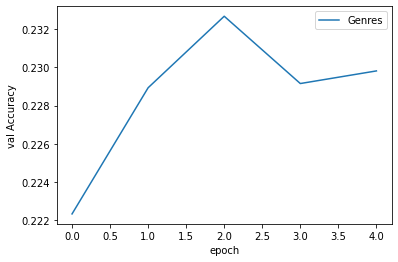

In [ ]:
import seaborn as sns

sns.lineplot(x='epoch', y='val Accuracy', data=simple_rnn_results_genres, label='Genres')

## 2. Book Cover Data

### 2.1 Download the Data

In [ ]:
download_url = 'https://github.com/uchidalab/book-dataset/raw/master/Task2/book32-listing.csv'
!wget $download_url

--2021-04-13 02:11:24--  https://github.com/uchidalab/book-dataset/raw/master/Task2/book32-listing.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/uchidalab/book-dataset/master/Task2/book32-listing.csv [following]
--2021-04-13 02:11:25--  https://raw.githubusercontent.com/uchidalab/book-dataset/master/Task2/book32-listing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39483760 (38M) [text/plain]
Saving to: ‘book32-listing.csv’

book32-listing.csv  100%[===================>]  37.65M  72.1MB/s    in 0.5s    

2021-04-13 02:11:26 (72.1 MB/s) - ‘book32-listing.csv’ saved [39483760/39483760]

In [ ]:
#adapted from https://github.com/uchidalab/book-dataset/tree/master/scripts

csv_filepath = 'book32-listing.csv'
output_dirpath = 'covers'

header_names = ['Amazon ID (ASIN)', 'Filename', 'Image URL', 'Title', 'Author', 'Category ID',
                'Category']
with codecs.open(csv_filepath, mode='r', encoding='utf-8', errors='ignore') as f:
    csv = pd.read_csv(f, delimiter=",", header=None, names=header_names)

if not os.path.isdir(output_dirpath):
    os.makedirs(output_dirpath)

def download_image(i):
    filename = csv.iloc[i]['Filename']
    category = csv.iloc[i]['Category']
    inner_output_dirpath = os.path.join(output_dirpath, category)
    if not os.path.isdir(inner_output_dirpath):
        os.mkdir(inner_output_dirpath)
    output_filepath = os.path.join(inner_output_dirpath, filename)

    url = csv.iloc[i]['Image URL']
    if not os.path.isfile(output_filepath):
        downloaded_img = request.urlopen(url)
        f = open(output_filepath, mode='wb')
        f.write(downloaded_img.read())
        downloaded_img.close()
        f.close()

def download_all_images():
    print('[Download images into "{}"]'.format(args.output_dirpath))
    Parallel(n_jobs=-1)(delayed(download_image)(i) for i in trange(len(csv)))

In [ ]:
cover_cols = ['Amazon ID (ASIN)', 'Filename', 'Image URL', 'Title', 'Author', 'Category ID','Category']
books_cover = pd.read_csv(csv_filepath, header=None, names=cover_cols, encoding='latin1', error_bad_lines=False)
books_cover.head()

,Amazon ID (ASIN),Filename,Image URL,Title,Author,Category ID,Category
0,761183272,0761183272.jpg,http://ecx.images-amazon.com/images/I/61Y5cOdH...,Mom's Family Wall Calendar 2016,Sandra Boynton,3,Calendars
1,1623439671,1623439671.jpg,http://ecx.images-amazon.com/images/I/61t-hrSw...,Doug the Pug 2016 Wall Calendar,Doug the Pug,3,Calendars
2,B00O80WC6I,B00O80WC6I.jpg,http://ecx.images-amazon.com/images/I/41X-KQqs...,"Moleskine 2016 Weekly Notebook, 12M, Large, Bl...",Moleskine,3,Calendars
3,761182187,0761182187.jpg,http://ecx.images-amazon.com/images/I/61j-4gxJ...,365 Cats Color Page-A-Day Calendar 2016,Workman Publishing,3,Calendars
4,1578052084,1578052084.jpg,http://ecx.images-amazon.com/images/I/51Ry4Tsq...,Sierra Club Engagement Calendar 2016,Sierra Club,3,Calendars


In [ ]:
books_cover.describe()

,Category ID
count,207572.000000
mean,14.491680
std,9.069057
min,0.000000
25%,7.000000
50%,13.000000
75%,23.000000
max,31.000000


In [ ]:
# what is the shape of our data?
books_cover.shape

(207572, 7)

We successfully downloaded the data! We have 7 columns and 207572 rows.

### 2.2 Clean the Data

#### 2.2.1 What do our categories look like?

In [ ]:
books_cover['Category'].value_counts()

Travel                          18338
Children's Books                13605
Medical Books                   12086
Health, Fitness & Dieting       11886
Business & Money                 9965
Crafts, Hobbies & Home           9934
Science & Math                   9276
Christian Books & Bibles         9139
Cookbooks, Food & Wine           8802
Computers & Technology           7979
Literature & Fiction             7580
Religion & Spirituality          7559
Teen & Young Adult               7489
Law                              7314
Humor & Entertainment            6896
History                          6807
Arts & Photography               6460
Sports & Outdoors                5968
Romance                          4291
Biographies & Memoirs            4261
Science Fiction & Fantasy        3800
Politics & Social Sciences       3402
Reference                        3268
Comics & Graphic Novels          3026
Test Preparation                 2906
Self-Help                        2703
Engineering 

#### 2.2.2 Category mapping file
I'm going to export the dataframe as a csv, do the mappings in excel, and the bring the new csv file back in, which I'll use as the final dataframe.

In [ ]:
# export file to csv
books_cover.to_csv('book_cover.csv')

Bring in Category Mapping File

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = "https://drive.google.com/file/d/1vejvaN7-5Nk1sEi0ePJZGOGCgLLm9gYx/view?usp=sharing"

id = '1vejvaN7-5Nk1sEi0ePJZGOGCgLLm9gYx'

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('books_cover.csv', mimetype='application/vnd.openxmlformats-officedocument.spreadsheetml.sheet')

In [ ]:
books_cover_new = pd.read_csv('books_cover.csv', encoding="ISO-8859-1")
books_cover_new = books_cover_new[['Amazon ID (ASIN)', 'Filename','Image URL', 'Title','Author', 'Old Category','Category']]
books_cover_new.sample(5)

,Amazon ID (ASIN),Filename,Image URL,Title,Author,Old Category,Category
88690,582409004,0582409004.jpg,http://ecx.images-amazon.com/images/I/51JPEORd...,Practical Lambing: A Guide to Veterinary Care ...,F. A. Eales,Medical Books,Technical
171168,595410014,0595410014.jpg,http://ecx.images-amazon.com/images/I/51QB9RS7...,Places Around the World!: A Number Crossword P...,Bridgette Jackson,Teen & Young Adult,Literary Fiction
175149,737725796,0737725796.jpg,http://ecx.images-amazon.com/images/I/51W135E6...,Opposing Viewpoints in World History - The Cre...,NaN,Teen & Young Adult,Literary Fiction
119716,1454809159,1454809159.jpg,http://ecx.images-amazon.com/images/I/51W4V5Pq...,"Emanuel Law Outlines: Property, Eighth Edition",Steven L. Emanuel,Business & Money,Non-Fiction
177859,394861027,0394861027.jpg,http://ecx.images-amazon.com/images/I/515S8PZZ...,It's Not Easy Being a Bunny (Beginner Books(R)),Marilyn Sadler,Children's Books,Other


In [ ]:
# what is the new shape of our data?
books_cover_new.shape

(207572, 7)

*These are the mappings I used. I did my best to get the categories in a similar count range and this is an area that could use some improvement.*

**Help Books:** Arts & Photographs, Cookbooks & Food & Wine, Crafts & Hobbies & Home, Education & Teaching, Parenting & Relationships, Self-Help, Test Preparation

**Literary Fiction:** Gay & Lesbian, Literature & Fiction, Mystery & Thriller & Suspense, Romance, Science Fiction & Fantasy, Teen & Young Adult

**Non-Fiction:** Biographies & Memoirs, Business & Money, History, Law, Politics & Social Sciences, Reference

**Other:** Calendars, Children's Books, Comics & Graphic Novels, Humor & Entertainment

**Outdoorsy:** Health & Fitness & Dieting, Sports & Outdoors, Travel

**Religious:** Christian Books & Bibles, Religion & Spirtuality

**Technical:** Computers & Technology, Engineering & Transportation, Medical Books, Science & Math

In [ ]:
# what is the count for each cateogry? Amazon ID is a unique value, so I'll use that for counts
books_cover_new[['Category','Amazon ID (ASIN)']].groupby(['Category']).count()

,Amazon ID (ASIN)
Category,
Help Books,34992
Literary Fiction,26497
Non-Fiction,35017
Other,26163
Outdoorsy,36192
Religious,16698
Technical,32013


#### 2.2.3 Rest of the Data Cleaning

In [ ]:
cover_data = books_cover_new.copy()

# drop null values
cover_data = cover_data.dropna()

### 2.3 Neural Networks
- Building Model
- Simple CNN

#### 2.3.1 Building Model

Need to download the images now. I'll be using 5,000 images from each category.

In [ ]:
covers_help = cover_data[cover_data['Category']=='Help Books'].sample(5000)
covers_lit_fic = cover_data[cover_data['Category']=='Literary Fiction'].sample(5000)
covers_non_fic = cover_data[cover_data['Category']=='Non-Fiction'].sample(5000)
covers_other = cover_data[cover_data['Category']=='Other'].sample(5000)
covers_out = cover_data[cover_data['Category']=='Outdoorsy'].sample(5000)
covers_rel = cover_data[cover_data['Category']=='Religious'].sample(5000)
covers_tech = cover_data[cover_data['Category']=='Technical'].sample(5000)

cover_data = pd.concat([covers_help, covers_lit_fic, covers_non_fic, covers_other, covers_out, covers_rel, covers_tech])

cover_data

,Amazon ID (ASIN),Filename,Image URL,Title,Author,Old Category,Category
44940,1580081266,1580081266.jpg,http://ecx.images-amazon.com/images/I/51ScoIX4...,The New Enchanted Broccoli Forest (Mollie Katz...,Mollie Katzen,"Cookbooks, Food & Wine",Help Books
57799,1861088302,1861088302.jpg,http://ecx.images-amazon.com/images/I/61QFt1AQ...,The Art of Airbrushing: A Simple Guide to Mast...,Giorgio Uccellini,Arts & Photography,Help Books
52411,1580934226,1580934226.jpg,http://ecx.images-amazon.com/images/I/61W1dQbe...,Interior Landmarks: Treasures of New York,Judith Gura,"Crafts, Hobbies & Home",Help Books
66731,1118135482,1118135482.jpg,http://ecx.images-amazon.com/images/I/51EwZFSV...,Outsmarting Anger: 7 Strategies for Defusing O...,Joseph Shrand,Self-Help,Help Books
40629,1556437951,1556437951.jpg,http://ecx.images-amazon.com/images/I/51zFR4sL...,Edible and Medicinal Mushrooms of New England ...,David L. Spahr,"Cookbooks, Food & Wine",Help Books
...,...,...,...,...,...,...,...
35981,1585039543,1585039543.jpg,http://ecx.images-amazon.com/images/I/51hqLHv1...,Autodesk Maya 2016 Basics Guide,Kelly Murdock,Engineering & Transportation,Technical
86193,393710726,0393710726.jpg,http://ecx.images-amazon.com/images/I/51e6rBRb...,Hakomi Mindfulness-Centered Somatic Psychother...,Halko Weiss,Medical Books,Technical
91674,1576071472,1576071472.jpg,http://ecx.images-amazon.com/images/I/51DAZCDR...,Animals and the Law: A Sourcebook,Jordan Curnutt,Science & Math,Technical
93939,756690420,0756690420.jpg,http://ecx.images-amazon.com/images/I/51JHHW5M...,Nature Guide: Rocks and Minerals (Nature Guides),DK Publishing,Science & Math,Technical


In [ ]:
cover_data.describe()

,Amazon ID (ASIN),Filename,Image URL,Title,Author,Old Category,Category
count,35000,35000,35000,35000,35000,35000,35000
unique,35000,35000,34984,34873,28291,32,7
top,1468179861,0531213358.jpg,http://ecx.images-amazon.com/images/I/31VMk1dU...,Managerial Accounting,DK Publishing,Christian Books & Bibles,Help Books
freq,1,1,3,4,70,2719,5000


**Downloaded the images off of google colab so I could let the code run overnight. Uploaded those images into my Google Drive.**

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Resize all of the images to 100x100.

In [ ]:
import os
from PIL import Image

# do it for the help books
for file in os.listdir("gdrive/MyDrive/covers/Help Books"):
    image = Image.open("gdrive/MyDrive/covers/Help Books/"+file).convert('RGB')
    image = image.resize((150,150))
    image.save("gdrive/MyDrive/covers/Help Books/"+file)

In [ ]:
# check to see if it worked
image = Image.open("gdrive/MyDrive/covers/Help Books/0002553481.jpg")
image.size

(150, 150)

In [ ]:
# do it for the Literary Fiction books
for file in os.listdir("gdrive/MyDrive/covers/Literary Fiction"):
    image = Image.open("gdrive/MyDrive/covers/Literary Fiction/"+file).convert('RGB')
    image = image.resize((150,150))
    image.save("gdrive/MyDrive/covers/Literary Fiction/"+file)

# do it for the Non-Fiction books
for file in os.listdir("gdrive/MyDrive/covers/Non-Fiction"):
    image = Image.open("gdrive/MyDrive/covers/Non-Fiction/"+file).convert('RGB')
    image = image.resize((150,150))
    image.save("gdrive/MyDrive/covers/Non-Fiction/"+file)

# do it for the Other books
for file in os.listdir("gdrive/MyDrive/covers/Other"):
    image = Image.open("gdrive/MyDrive/covers/Other/"+file).convert('RGB')
    image = image.resize((150,150))
    image.save("gdrive/MyDrive/covers/Other/"+file)

# do it for the Outdoorsy books
for file in os.listdir("gdrive/MyDrive/covers/Outdoorsy"):
    image = Image.open("gdrive/MyDrive/covers/Outdoorsy/"+file).convert('RGB')
    image = image.resize((150,150))
    image.save("gdrive/MyDrive/covers/Outdoorsy/"+file)


Split files into their Cateogry based on the dataframe.

In [ ]:
import os

for file in os.listdir("covers"):
  category = cover_data[cover_data['Filename'] == file]['Category']
  try:
    category = category.to_list()[0]
    if not os.path.exists("covers/"+category):
      os.mkdir("covers/"+category)
  
    if not os.path.exists("covers/"+category+"/"+file):
      os.rename("covers/"+file,"covers/"+category+"/"+file)
  except:
    print(category)




Series([], Name: Category, dtype: object)
Series([], Name: Category, dtype: object)
Series([], Name: Category, dtype: object)
Series([], Name: Category, dtype: object)


Split into training and testing datasets.

In [ ]:
# Code adapted from: https://stackoverflow.com/questions/57394135/split-image-dataset-into-train-test-datasets

import shutil
import random

base_dir = 'gdrive/MyDrive/covers/'
classes = ['Help Books','Literary Fiction', 'Other', 'Non-Fiction','Outdoorsy']

test_ratio = .20

for cls in classes:
  if not os.path.exists(base_dir+"train/"+cls):
    os.makedirs(base_dir + "train/" + cls)
  
  if not os.path.exists(base_dir + "test/" + cls):
    os.makedirs(base_dir + "test/" + cls)

  src = base_dir + cls

  allFileNames = os.listdir(src)
  np.random.shuffle(allFileNames)
  train_FileNames, test_FileNames = np.split(np.array(allFileNames), [int(len(allFileNames)*(1-test_ratio))])

  train_FileNames = [src+"/"+name for name in train_FileNames.tolist()]
  test_FileNames = [src+"/"+name for name in test_FileNames.tolist()]

  print("*****************************")
  print(cls)
  print('Total images: ', len(allFileNames))
  print('Training: ', len(train_FileNames))
  print('Testing: ', len(test_FileNames))
  print("*****************************")

  #lab = ['Help Books','Literary Fiction', 'Other', 'Non-Fiction','Outdoorsy']

  for name in train_FileNames:
    shutil.copy(name, base_dir + 'train/' + cls+'/')

  for name in test_FileNames:
    shutil.copy(name, base_dir + "test/" + cls+"/")

  print("Copying Done!\n")

*****************************
Help Books
Total images:  4983
Training:  3986
Testing:  997
*****************************
Copying Done!

*****************************
Literary Fiction
Total images:  4998
Training:  3998
Testing:  1000
*****************************
Copying Done!

*****************************
Other
Total images:  4987
Training:  3989
Testing:  998
*****************************
Copying Done!

*****************************
Non-Fiction
Total images:  4984
Training:  3987
Testing:  997
*****************************
Copying Done!

*****************************
Outdoorsy
Total images:  4991
Training:  3992
Testing:  999
*****************************
Copying Done!



In [ ]:
# Next 2 lines of code adapted from: https://towardsdatascience.com/building-a-convolutional-neural-network-for-image-classification-with-tensorflow-f1f2f56bd83b

train_dir = os.path.join(base_dir, "train/")
test_dir = os.path.join(base_dir, "test/")

# Directory with our training pictures
train_help_books_dir = os.path.join(train_dir, 'Help Books')
train_lit_fic_dir = os.path.join(train_dir, "Literary Fiction")
train_other_dir = os.path.join(train_dir, 'Other')
train_non_fic_dir = os.path.join(train_dir, "Non-Fiction")
train_out_dir = os.path.join(train_dir, "Outdoorsy")

# Directory with our testing pictures
test_help_books_dir = os.path.join(test_dir, 'Help Books')
test_lit_fic_dir = os.path.join(test_dir, 'Literary Fiction')
test_other_dir = os.path.join(test_dir, 'Other')
test_non_fic_dir = os.path.join(test_dir, "Non-Fiction")
test_out_dir = os.path.join(test_dir, "Outdoorsy")

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./225.
train_datagen = ImageDataGenerator(rescale = 1.0/225.)
test_datagen = ImageDataGenerator(rescale = 1.0/225.)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'categorical', target_size = (150,150))

# Flow testing images in batches of 20 using test_datagen generator
test_generator = test_datagen.flow_from_directory(test_dir, batch_size = 20, class_mode = 'categorical', target_size = (150,150))

Found 40732 images belonging to 6 classes.
Found 31405 images belonging to 6 classes.


#### 2.3.2 Build Simple CNN

Links to look at:
- Simple CNN with multiple categories: https://towardsdatascience.com/a-simple-cnn-multi-image-classifier-31c463324fa
- Simple CNN with 3 images, question: https://stackoverflow.com/questions/46685698/how-to-do-multi-class-image-classification-in-keras
- Simples Binary CNN: https://towardsdatascience.com/building-a-convolutional-neural-network-for-image-classification-with-tensorflow-f1f2f56bd83b

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(6, activation='sigmoid')
])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001), loss="binary_crossentropy",metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 18496)            

In [ ]:
# code adapted from: https://towardsdatascience.com/building-a-convolutional-neural-network-for-image-classification-with-tensorflow-f1f2f56bd83b
history = model.fit_generator(train_generator, validation_data=test_generator, steps_per_epoch=100,epochs=5, validation_steps=50, verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
100/100 [==============================] - 81s 811ms/step - loss: 0.3397 - acc: 0.5910 - val_loss: 0.4232 - val_acc: 0.4200
Epoch 2/5
100/100 [==============================] - 77s 760ms/step - loss: 0.3188 - acc: 0.6320 - val_loss: 0.4739 - val_acc: 0.4220
Epoch 3/5
100/100 [==============================] - 75s 750ms/step - loss: 0.3338 - acc: 0.5960 - val_loss: 0.4183 - val_acc: 0.4210
Epoch 4/5
100/100 [==============================] - 73s 732ms/step - loss: 0.3319 - acc: 0.6010 - val_loss: 0.4145 - val_acc: 0.4000
Epoch 5/5
100/100 [==============================] - 73s 735ms/step - loss: 0.3334 - acc: 0.5935 - val_loss: 0.3937 - val_acc: 0.4240
